#importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/inswap_dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4117 files belonging to 46 classes.


#validation image preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/inswap_dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 459 files belonging to 46 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

#Building Convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=46,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
129/129 [==============================] - 745s 5s/step - loss: 6.9918 - accuracy: 0.0211 - val_loss: 3.8283 - val_accuracy: 0.0240
Epoch 2/32
129/129 [==============================] - 161s 1s/step - loss: 3.7959 - accuracy: 0.0369 - val_loss: 3.7288 - val_accuracy: 0.0566
Epoch 3/32
129/129 [==============================] - 162s 1s/step - loss: 3.7167 - accuracy: 0.0578 - val_loss: 3.7069 - val_accuracy: 0.0588
Epoch 4/32
129/129 [==============================] - 159s 1s/step - loss: 3.6767 - accuracy: 0.0600 - val_loss: 3.6306 - val_accuracy: 0.0828
Epoch 5/32
129/129 [==============================] - 161s 1s/step - loss: 3.6457 - accuracy: 0.0719 - val_loss: 3.5563 - val_accuracy: 0.1046
Epoch 6/32
129/129 [==============================] - 162s 1s/step - loss: 3.6060 - accuracy: 0.0887 - val_loss: 3.4809 - val_accuracy: 0.1438
Epoch 7/32
129/129 [==============================] - 165s 1s/step - loss: 3.5305 - accuracy: 0.1003 - val_loss: 3.3651 - val_accuracy: 0.1699

##Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

129/129 [==============================] - 106s 796ms/step - loss: 0.0625 - accuracy: 0.9845
Training accuracy: 0.9844546914100647


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


15/15 [==============================] - 14s 315ms/step - loss: 0.7168 - accuracy: 0.8867
Validation accuracy: 0.8867102265357971


##Saving Model

In [ ]:
cnn.save('trained_model.h5')

NameError: ignored

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [8.081548690795898,
  3.7963314056396484,
  3.6145119667053223,
  3.427704334259033,
  3.335803270339966,
  3.1488726139068604,
  2.979336738586426,
  2.7955844402313232,
  2.6081089973449707,
  2.4687340259552,
  2.1657614707946777,
  1.9606437683105469,
  1.829230785369873,
  1.5380703210830688,
  1.3812326192855835,
  1.2425519227981567,
  1.103662371635437,
  0.944428563117981,
  0.8440113663673401,
  0.7357413172721863,
  0.6862757205963135,
  0.5514567494392395,
  0.5346470475196838,
  0.505726158618927,
  0.47018808126449585,
  0.411493718624115,
  0.3674148619174957,
  0.3007037937641144,
  0.3867807388305664,
  0.2981170117855072,
  0.2581191658973694,
  0.27460721135139465],
 'accuracy': [0.019674520939588547,
  0.034248240292072296,
  0.04615011066198349,
  0.0582948736846447,
  0.0959436446428299,
  0.12387660890817642,
  0.16419723629951477,
  0.2093757539987564,
  0.2523682415485382,
  0.3031333386898041,
  0.3789166808128357,
  0.4289531111717224,
  0.4700024425

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 88.67102265357971 %


#Accuracy Visualization

##Training Visualization

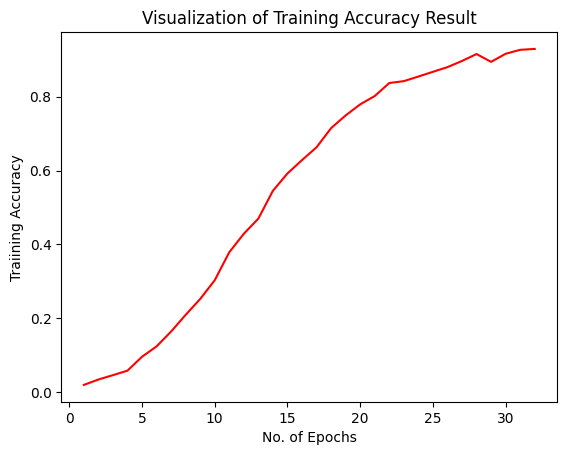

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

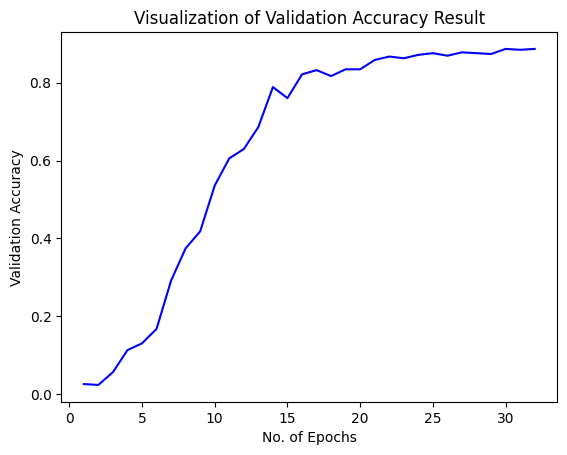

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test Set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/inswap_dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 460 files belonging to 46 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

15/15 [==============================] - 93s 3s/step - loss: 0.6257 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


In [ ]:
# Convert the SavedModel to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

NameError: ignored